Name: Anik Chakraborty (waytoanik@outlook.com)

Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Dataset characteristics

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [1]:
#importing required libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

In [2]:
warnings.filterwarnings("ignore")

## Reading and Understanding the Data

In [3]:
#Loading data
bike_df0= pd.read_csv('day.csv')
bike_df0.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
#Checking shape
bike_df0.shape

(730, 16)

In [5]:
#Checking dataframe info
bike_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking descriptive statistics
bike_df0.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


There is no missing value in the dataset. Also there is no unrealistic min- max value present for any variables.

## Basic Data Cleanup

In [7]:
#Checking no. of unique values in every column
bike_df0.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

**droping 'instant' as it's just record index.**

In [8]:
bike_df0.drop('instant', axis=1, inplace= True)
bike_df0.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


**'dteday' is of object type, so changing the data type to datetime.**


In [9]:
bike_df0['dteday']= pd.to_datetime(bike_df0.dteday)

We already have 'season','yr','mnth','holiday','weekday', 'workingday' data captured. So calculating day difference from the minimum date present in this dataset and replacing 'dtday' with 'daydiff'

In [10]:
# Calculating 'daydiff' and droping 'dteday' column
bike_df0['daydiff']= (bike_df0.dteday - bike_df0.dteday.min()).dt.days
bike_df0.drop('dteday', axis=1, inplace= True)

#Checking bike_df0 dataframe
bike_df0.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daydiff
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,31
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,59


**'season','mnth','weekday', 'weathersit', 'yr', 'holiday','workingday'- these are categorical variables, replacing the numeric values, with the actual string values  (as mentioned in the data dictionary).**

This will help to understand better during EDA.

In [11]:
# Replacing season with its actual value
bike_df0['season']= bike_df0.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [12]:
# Replacing numeric values of mnth column with its actual value
bike_df0['mnth']= bike_df0.mnth.map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 
                           9: 'september', 10: 'october', 11: 'november', 12: 'december'})

In [13]:
# Replacing numeric values of weekday column with its actual value
bike_df0['weekday']= bike_df0.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 
                               6: 'saturday'})

In [14]:
# Replacing numeric values of weathersit column with actual values

bike_df0['weathersit']= bike_df0.weathersit.map({1: 'Clear_PartlyCloudy', 2: 'Mist&Cloudy', 
                                                 3: 'LightSnow_LightRain&Thunderstorm', 
                                                 4: 'HeavyRain+IcePallets&Thunderstorm&Mist'})

In [15]:
# Replacing value of yr column for better understanding
bike_df0['yr']= bike_df0.yr.map({0: '2018', 1: '2019'})

In [16]:
# 'holiday','workingday' - Replaning 1 with 'Yes' and 0 with 'No'
bike_df0['holiday']= bike_df0.holiday.map({0: 'No', 1: 'Yes'})
bike_df0['workingday']= bike_df0.workingday.map({0: 'No', 1: 'Yes'})

In [17]:
# Checking bike_df0 dataframe
bike_df0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daydiff
0,spring,2018,january,No,monday,Yes,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,spring,2018,january,No,tuesday,Yes,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,31
2,spring,2018,january,No,wednesday,Yes,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,59
3,spring,2018,january,No,thursday,Yes,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,90
4,spring,2018,january,No,friday,Yes,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,120


In [18]:
# Checking data types of bike_df0 columns
bike_df0.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
daydiff         int64
dtype: object

## Visualizing Data

### Visualizing Numerical Variables

<Figure size 864x504 with 0 Axes>

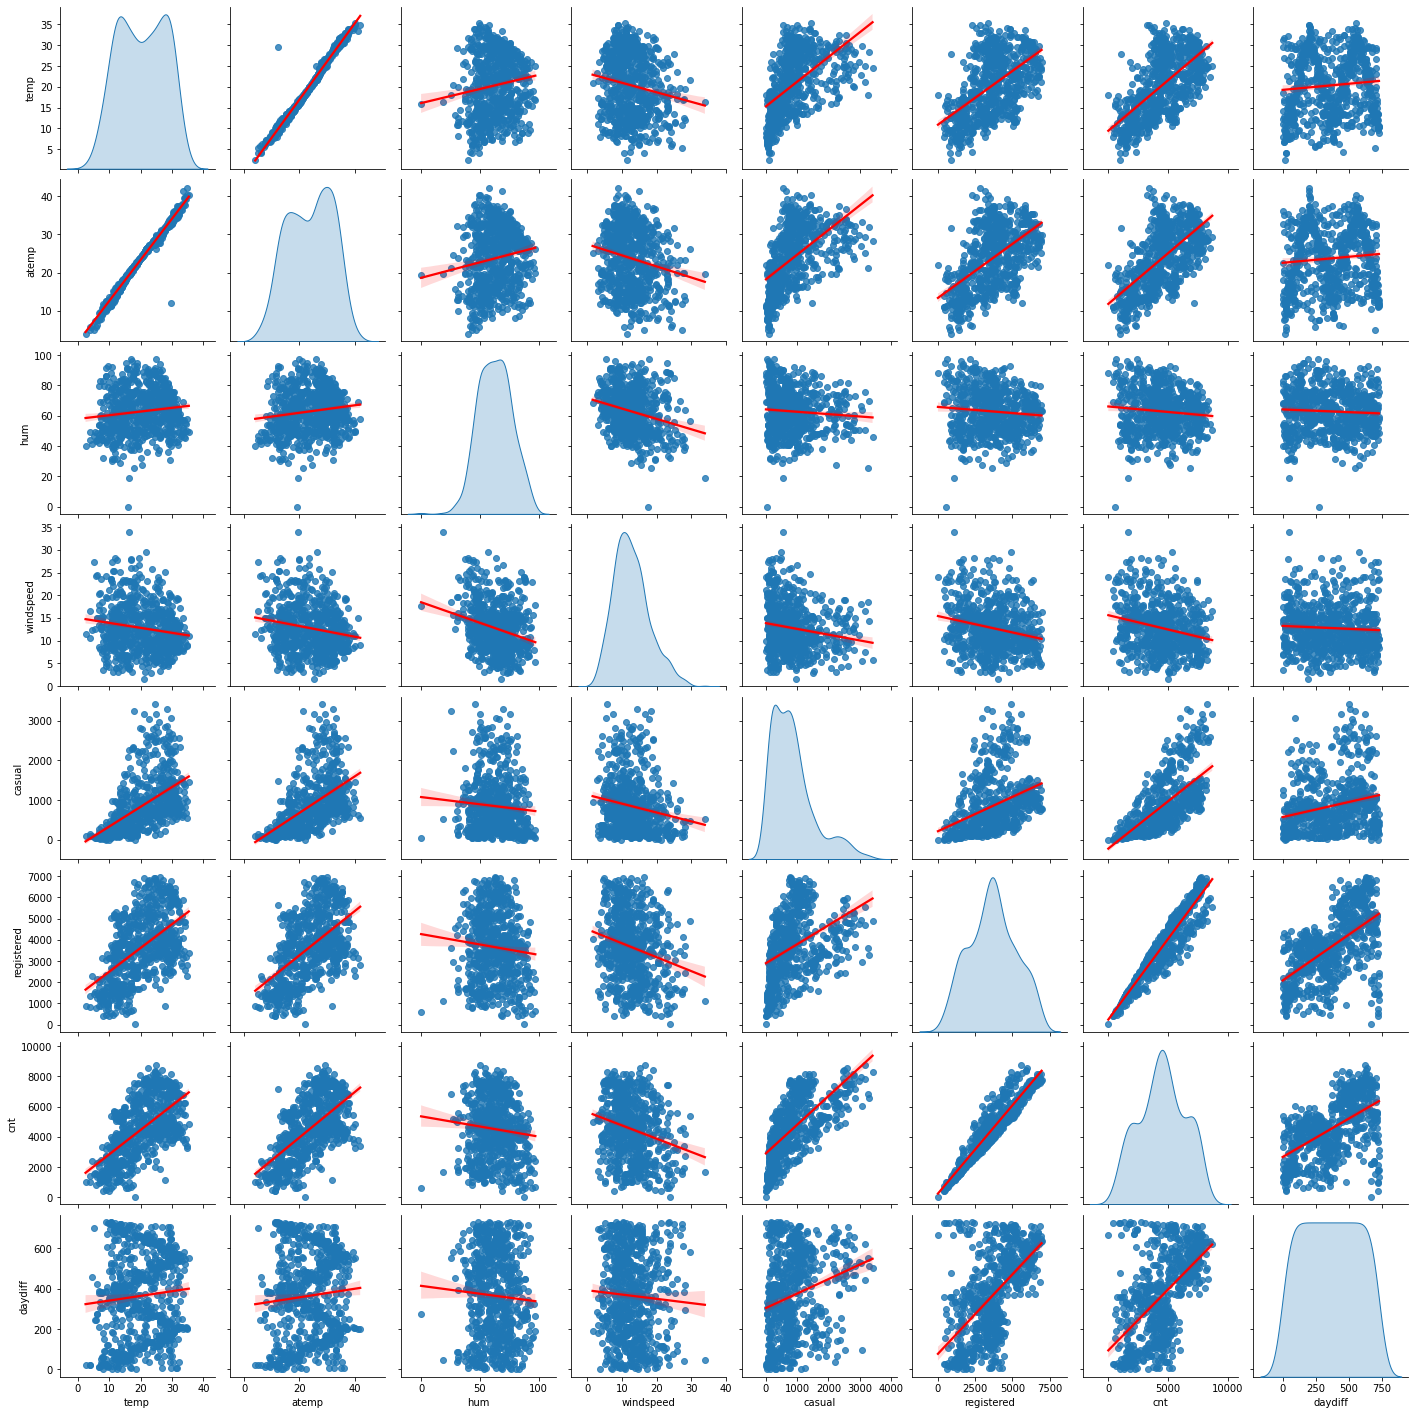

In [19]:
# Creating pairplot of all the numeric variables
plt.figure(figsize=[12,7])
sns.pairplot(bike_df0.select_dtypes(include= ['int64','float64']), kind= 'reg', diag_kind= 'kde', 
             plot_kws= {'line_kws': {'color':'red'}})
plt.show()

1. It can be seen that 'cnt' has some good positive linear relation with 'temp' and 'atemp'.
2. Again 'temp' and 'atemp' have very strong linear relation between them. We may need to handle it in later scetion otherwise it may impact our linear model by incraesing VIF.
3. 'register' and 'casual' both have very high linear relation with 'cnt'. It's obvious as in metadata we can see that 'cnt'= 'register' + 'casual'

### Visualizing Categorical Variable

In [20]:
# Getting Categorical columns
cols= bike_df0.select_dtypes(include=['object']).columns

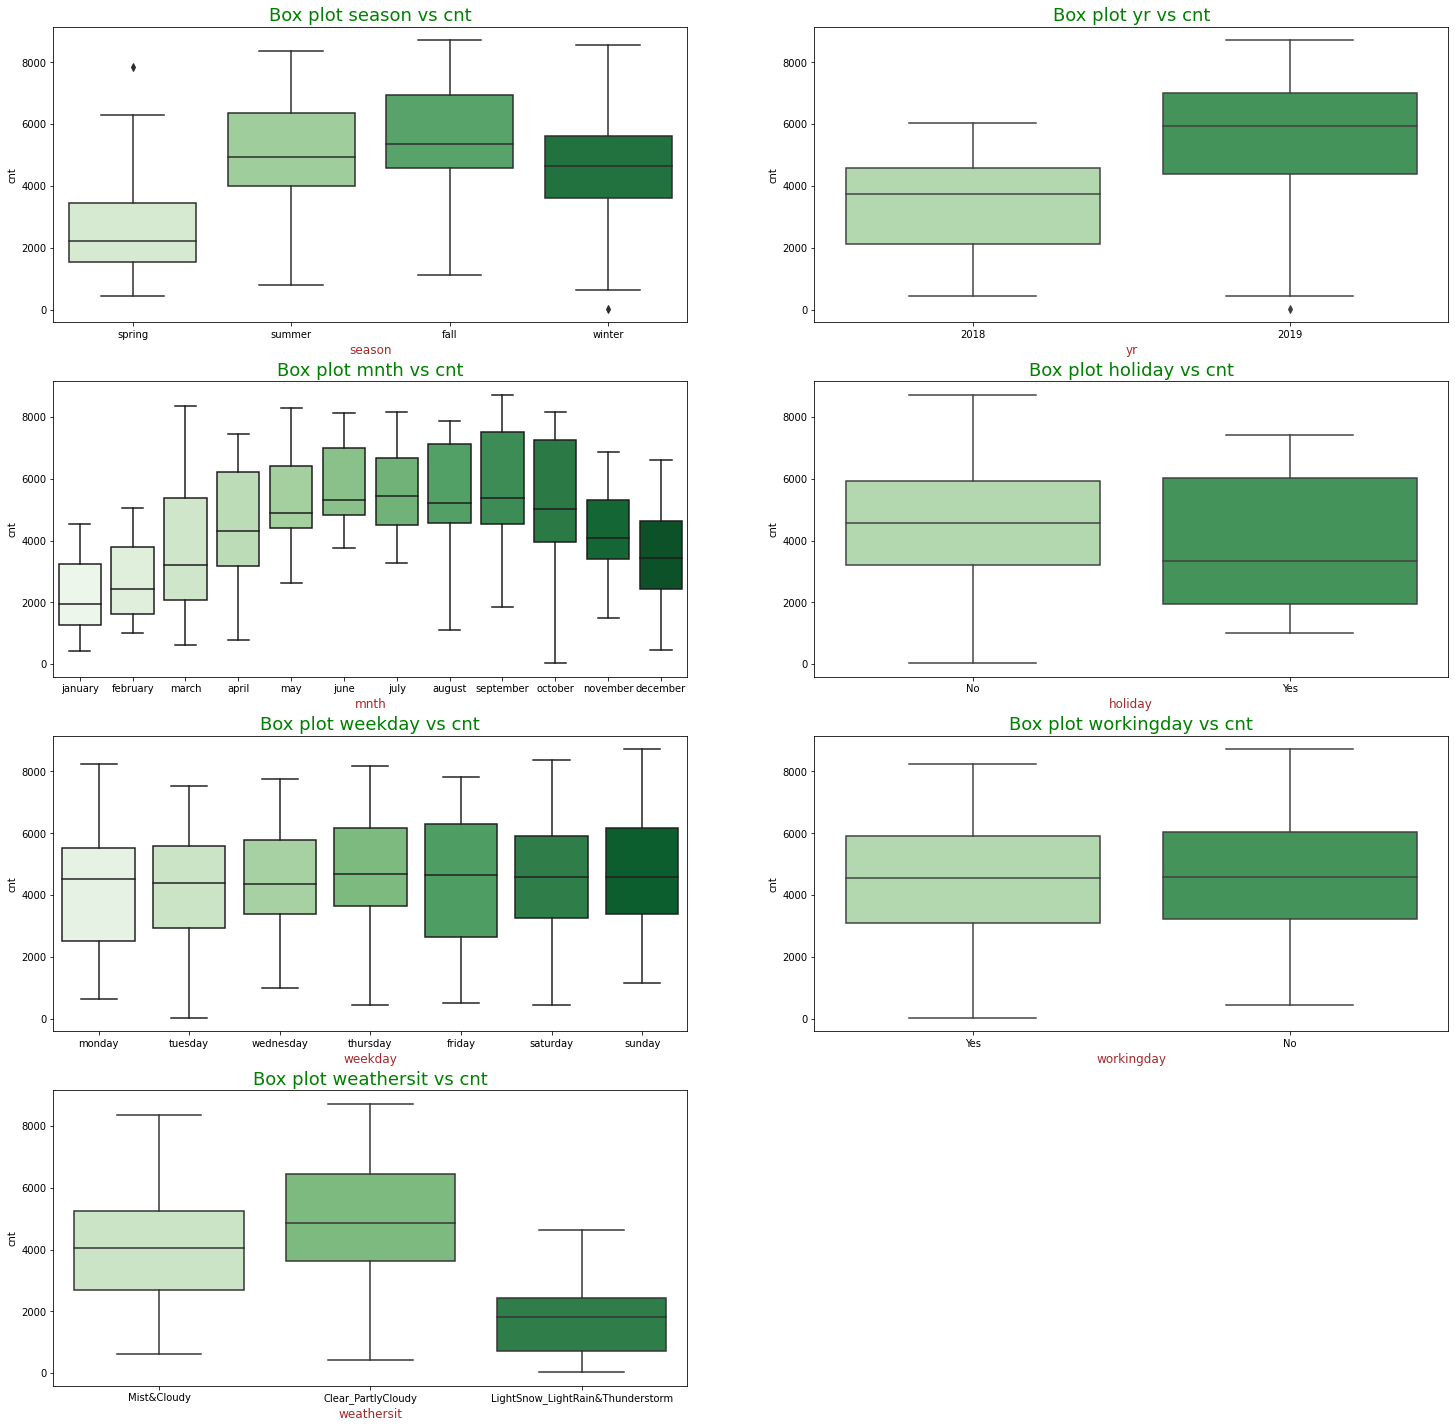

In [21]:
# Box plot

plt.figure(figsize=[25,25])

for i, col in enumerate(cols, 1):
    plt.subplot(4,2,i)
    title_text= f'Box plot {col} vs cnt'
    x_label= f'{col}'
    fig= sns.boxplot(data= bike_df0, x= col, y= 'cnt', palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})

1. Demand gets reduced during Springtime (Specially during January and December). Demand is higher during Fall and Summer.
2. Count of total rental bikes is higher in 2019 in compared to 2018. It can be said that the platform is gradually gaining more popularity.
3. Demand is comparatively bit lower on Tuesday and Wednesday.
4. There is not much difference in demand during working or non-working days. The reason might be people use this bike service as the mode of commute for going to their works as well as for other purpose.
5. If the weather condition is Clear or Partly Cloudy the rental demand is higher. Where during Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds the demand goes down.


### Correlation Heatmap

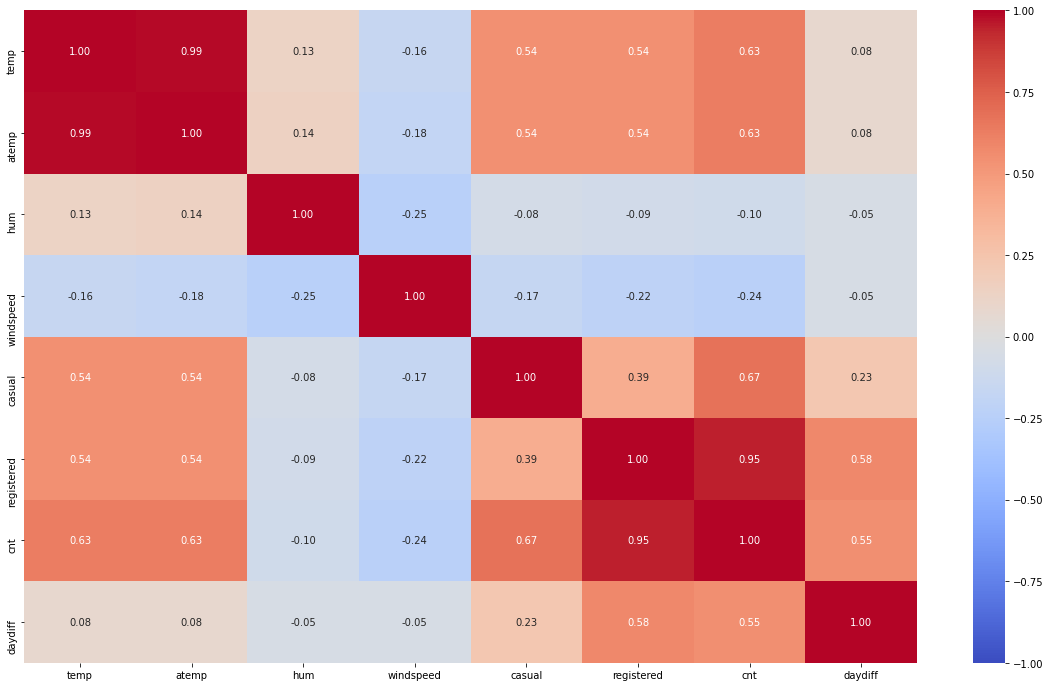

In [22]:
# Creating correlation heatmap
plt.figure(figsize = (20, 12))
sns.heatmap(bike_df0.select_dtypes(include= ['int64','float64']).corr(), annot= True, 
            cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

There is a very high correlation (.99) between 'atemp' and 'temp'. We need to handle this during data preparation.
Also 'registered' and 'casual' have very high correlation with 'cnt'.

## Data Preparation:

In [23]:
# From bike_df0, creating new dataframe bike_df1 to use in model building
bike_df1= bike_df0.copy()

In [24]:
# Checking values in 'season' feature
bike_df1.season.value_counts(normalize= True)

fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64

**'season' have values as (1:spring, 2:summer, 3:fall, 4:winter)which have specific labels associated with them.**

'season' is not an ordinal rather a nomical categorical variable. So here we will ue dummy variables to repraesent the 'saeson' column and will drop original 'season' column.


In [25]:
# Get the dummy variables for the feature 'season' and store it in a new dataframe 'season_df' and drop its first column
season_df= pd.get_dummies(bike_df1.season, drop_first=True)

# Checking what's in 'season_df'
season_df.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
# Adding the season_df dataframe to the original bike_df1 dataframe
bike_df1= pd.concat([bike_df1, season_df], axis=1)

# Droping 'season' feature from bike_df1 dataframe
bike_df1= bike_df1.drop('season', axis=1)
bike_df1.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daydiff,spring,summer,winter
0,2018,january,No,monday,Yes,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0
1,2018,january,No,tuesday,Yes,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,31,1,0,0
2,2018,january,No,wednesday,Yes,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,59,1,0,0
3,2018,january,No,thursday,Yes,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,90,1,0,0
4,2018,january,No,friday,Yes,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,120,1,0,0


In [27]:
#Checking values in yr feature
bike_df1.yr.value_counts(normalize= True)

2019    0.5
2018    0.5
Name: yr, dtype: float64

Here as 'yr' has only two categories, so we can set 0 as the base state, that is **year 2018** and 1 is denoting **year 2019**.

In [28]:
bike_df1['yr']= bike_df1.yr.map({'2018': 0, '2019': 1})

# Checking 'yr' column
bike_df1.yr.head(3)

0    0
1    0
2    0
Name: yr, dtype: int64

In [29]:
# Checking values in mnth
bike_df1.mnth.value_counts(normalize= True)

january      0.084932
october      0.084932
august       0.084932
july         0.084932
may          0.084932
december     0.084932
march        0.084932
june         0.082192
september    0.082192
november     0.082192
april        0.082192
february     0.076712
Name: mnth, dtype: float64

**As month is a nominal variable, let's replace 'mnth' with dummy variables.**

In [30]:
# Get the dummy variables for the feature 'mnth' and store it in a new dataframe 'mnth_df' and drop the first column
mnth_df= pd.get_dummies(bike_df1.mnth, drop_first=True)

# Checking what's in 'mnth_df'
mnth_df.head(3)

,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [31]:
# Adding the mnth_df dataframe to the original bike_df1 dataframe
bike_df1= pd.concat([bike_df1, mnth_df], axis=1)

# Droping 'mnth' feature from bike_df1 dataframe
bike_df1= bike_df1.drop('mnth', axis=1)

# Checking bike_df1 dataframe
bike_df1.head(3)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,december,february,january,july,june,march,may,november,october,september
0,0,No,monday,Yes,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,0,No,tuesday,Yes,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,0,No,wednesday,Yes,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0


In [32]:
# Checking values in holiday
bike_df1.holiday.value_counts(normalize= True)

No     0.971233
Yes    0.028767
Name: holiday, dtype: float64

As 'holiday' has only two categories, Here 0 is our base state, that is ***'It is not a holiday'** and 1 is denoting **'It is a holiday'.**

In [33]:
bike_df1['holiday']= bike_df1.holiday.map({'No': 0, 'Yes': 1})

# Checking bike_df1.holiday
bike_df1.holiday.head(3)

0    0
1    0
2    0
Name: holiday, dtype: int64

In [34]:
# Checking values in weekday
bike_df1.weekday.value_counts(normalize= True)

tuesday      0.143836
monday       0.143836
friday       0.142466
saturday     0.142466
wednesday    0.142466
thursday     0.142466
sunday       0.142466
Name: weekday, dtype: float64

**'weekday' is a nominal categorical variable, so using dummy variables to represent weekday.**

In [35]:
# Get the dummy variables for the feature 'weekday' and store it in a new dataframe 'weekday_df' and drop the first column
weekday_df= pd.get_dummies(bike_df1.weekday, drop_first=True)

# Checking what's in 'weekday_df'
weekday_df.head(3)

,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1


In [36]:
# Add the weekday_df dataframe to the original bike_df1 dataframe
bike_df1= pd.concat([bike_df1, weekday_df], axis=1)

# Droping 'weekday' feature from bike_df1 dataframe
bike_df1= bike_df1.drop('weekday', axis=1)

# Checking bike_df1 dataframe
bike_df1.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,Yes,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,1,0,0,0,0,0
1,0,0,Yes,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Yes,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Yes,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Yes,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Checking values in workingday
bike_df1.workingday.value_counts(normalize= True)

Yes    0.690411
No     0.309589
Name: workingday, dtype: float64

**Here 0 is our base state. if day is neither weekend nor holiday then it is 1.**

In [38]:
bike_df1['workingday']= bike_df1.workingday.map({'No': 0, 'Yes': 1})

# Checking bike_df1.workingday
bike_df1.workingday.head(3)

0    1
1    1
2    1
Name: workingday, dtype: int64

In [39]:
#Checking values in weathersit 
bike_df1.weathersit.value_counts(normalize= True)

Clear_PartlyCloudy                  0.634247
Mist&Cloudy                         0.336986
LightSnow_LightRain&Thunderstorm    0.028767
Name: weathersit, dtype: float64

It can be seen that in our dataset there are 3 types of weather condition is present.

    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
**As it's a nominal variable, it should be replaced by dummy variables to represent these 3 weather types.**

In [40]:
# Get the dummy variables for the feature 'weathersit' and store it in a new dataframe 'weathersit_df' and drop the first column
weathersit_df= pd.get_dummies(bike_df1.weathersit, prefix='weather', drop_first=True)

# Checking weathersit_df dataframe
weathersit_df.head(3)

,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
0,0,1
1,0,1
2,0,0


In [41]:
# Adding the weathersit_df dataframe to the original bike_df1 dataframe
bike_df1= pd.concat([bike_df1, weathersit_df], axis=1)

# Droping 'weathersit' feature from bike_df1 as we have created the dummies for it
bike_df1= bike_df1.drop('weathersit', axis=1)

# Checking bike_df1 dataframe
bike_df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


We have seen earlier temp, atemp, hum, windspeed, casual, registered, cnt all these are numeric columns.

Previously we have seen that temp and atemp have very high correlation (.95). So we should keep only one of these as predictor variable. As Feeling Temparature (atemp) seems more logical than Actual Temparature (temp) to decide whether a person will go out, so let's keep 'atemp' and drop 'temp'

In [42]:
bike_df1= bike_df1.drop(['temp'], axis= 1)

From data dictionary it can be seen, that **cnt= casual + registered**.
Here, for linear regression analysis 'cnt' will be Target. So there is no point of keeping 'casual' and 'registered', as if we use these two as our predictors then only these two features will be able to explain entire variability of 'cnt'. That's not significant here from business perspective Hence dropping 'casual' and 'registered' from dataset.

In [43]:
# Droping 'casual','registered' columns from bike_df1 dataframe
bike_df1= bike_df1.drop(['casual','registered'], axis= 1)

# Checking bike_df1 data frame
bike_df1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,daydiff,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,31,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,59,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,90,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,120,1,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [44]:
# Spliting data into train and set dataset with random_state=100
bike_train, bike_test= train_test_split(bike_df1, train_size= 0.7, random_state= 40)

### Performing Scaling on Train dataset

Using MinMax Scaling (min-max Normalization) to scale the train data.

In [45]:
# Performin MinMax Scaling to all columns except the 'yes-no' and 'dummy' variables

cols= ['atemp','hum','windspeed','daydiff','cnt']
scaler= MinMaxScaler()
bike_train[cols]= scaler.fit_transform(bike_train[cols])

In [46]:
# Checking the numeric columns
bike_train[cols].head()

,atemp,hum,windspeed,daydiff,cnt
96,0.465495,0.621297,0.288453,0.250344,0.358836
432,0.417436,0.419493,0.808970,0.836314,0.523125
687,0.389264,0.642335,0.438441,0.942228,0.630120
507,0.663593,0.798196,0.164117,0.694635,0.602623
2,0.144830,0.450603,0.465740,0.078404,0.152669


### Dividing Test dataset into X and y for Model Building

In [47]:
y_train= bike_train.pop('cnt')
y_train.head()

96     0.358836
432    0.523125
687    0.630120
507    0.602623
2      0.152669
Name: cnt, dtype: float64

In [48]:
X_train= bike_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,daydiff,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,0,0,0,0.465495,0.621297,0.288453,0.250344,0,1,0,...,0,0,0,1,0,0,0,0,0,0
432,1,0,0,0.417436,0.419493,0.808970,0.836314,1,0,0,...,0,0,0,1,0,0,0,0,0,1
687,1,0,1,0.389264,0.642335,0.438441,0.942228,0,0,1,...,0,0,0,0,0,0,1,0,0,1
507,1,0,1,0.663593,0.798196,0.164117,0.694635,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0.144830,0.450603,0.465740,0.078404,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Model Building

Here first I'll use RFE for Coarse Tunning to select 16 best features and then I'll manually check those top 16 features for Fine tuning the model.

### Coarse Tuning using RFE

In [49]:
# Creating a fitted model
lr= LinearRegression()
lr.fit(X_train, y_train)

# Running RFE to fing Top 16 Features
rfe= RFE(lr, 16)             
rfe= rfe.fit(X_train, y_train)

In [50]:
# All Features with Rank
all_features= np.array(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
all_features

array([['yr', 'True', '1'],
       ['holiday', 'True', '1'],
       ['workingday', 'True', '1'],
       ['atemp', 'True', '1'],
       ['hum', 'True', '1'],
       ['windspeed', 'True', '1'],
       ['daydiff', 'False', '4'],
       ['spring', 'True', '1'],
       ['summer', 'False', '10'],
       ['winter', 'True', '1'],
       ['august', 'False', '13'],
       ['december', 'True', '1'],
       ['february', 'False', '3'],
       ['january', 'False', '2'],
       ['july', 'True', '1'],
       ['june', 'False', '9'],
       ['march', 'False', '12'],
       ['may', 'False', '8'],
       ['november', 'True', '1'],
       ['october', 'False', '11'],
       ['september', 'True', '1'],
       ['monday', 'False', '5'],
       ['saturday', 'True', '1'],
       ['sunday', 'True', '1'],
       ['thursday', 'False', '14'],
       ['tuesday', 'False', '6'],
       ['wednesday', 'False', '7'],
       ['weather_LightSnow_LightRain&Thunderstorm', 'True', '1'],
       ['weather_Mist&Cloudy', 'True', '

In [51]:
# Showing Top 16 features selected using RFE
top_16_features= list(all_features[all_features[:,1]=='True'][:,0])
top_16_features

['yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'spring',
 'winter',
 'december',
 'july',
 'november',
 'september',
 'saturday',
 'sunday',
 'weather_LightSnow_LightRain&Thunderstorm',
 'weather_Mist&Cloudy']

### Building 1st Model Using Top 16 Features

In [52]:
X_train_final= X_train[top_16_features]
X_train_final.head(3)

,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,december,july,november,september,saturday,sunday,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,0,0,0,0.465495,0.621297,0.288453,0,0,0,0,0,0,1,0,0,0
432,1,0,0,0.417436,0.419493,0.808970,1,0,0,0,0,0,1,0,0,1
687,1,0,1,0.389264,0.642335,0.438441,0,1,0,0,1,0,0,0,0,1


In [53]:
# Building LR model using statsmodels
X_train_final= sm.add_constant(X_train_final) # Adding constraints
lr_1= sm.OLS(y_train, X_train_final)
lr_model_1= lr_1.fit() # Fitting the model

In [54]:
# Checking the summary of our first LR model
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     171.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          8.87e-190
Time:                        20:09:43   Log-Likelihood:                 506.82
No. Observations:                 510   AIC:                            -979.6
Df Residuals:                     493   BIC:                            -907.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. In the First model we have got R-squared value: .848 and Adjusted R-squared: .843. These are very good score and these two values are very close to each other.
2. All features have p value < 0.05 except 'sunday,'saturday' and 'workingday', so we can say that coefficients of all the predictor variables except 'sunday, 'saturday' and 'workingday' are statistically significant.
3. p value of F-statistic is close to 0. So we can say over all model fit is statistically significant and not by chance.
4. Let's see VIFs, to check if there is any multicollinearity present.

In [55]:
# Creating function to calculate VIFs

def vif_calculation(X_df):
    vif= pd.DataFrame()
    X= X_df.drop('const', axis= 1)
    vif['Features'] = X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    return (vif.sort_values('VIF', ascending= False))

In [56]:
# Calculating the VIFs for the 1st model

vif_calculation(X_train_final)

,Features,VIF
4,hum,39.28
2,workingday,38.62
3,atemp,20.40
12,saturday,8.13
13,sunday,7.72
5,windspeed,6.27
6,spring,3.12
7,winter,2.64
15,weather_Mist&Cloudy,2.53
1,holiday,2.16


Here we can see 'hum' has very high VIF value (25.06). Also sunday (0.541) has very high p-value.
So I am excluding 'sunday' from the predictor variables and building second Linear Regression model.

### Building 2nd Model

In [57]:
# Removing 'sunday' from predictor
X_train_final.drop('sunday', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head(3)

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,december,july,november,september,saturday,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,1.0,0,0,0,0.465495,0.621297,0.288453,0,0,0,0,0,0,1,0,0
432,1.0,1,0,0,0.417436,0.419493,0.808970,1,0,0,0,0,0,1,0,1
687,1.0,1,0,1,0.389264,0.642335,0.438441,0,1,0,0,1,0,0,0,1


In [58]:
# Building 2nd LR model using statsmodels

lr_2= sm.OLS(y_train, X_train_final)
lr_model_2= lr_2.fit() # Fitting the model

# Checking the summary of our first LR model
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          7.75e-191
Time:                        20:09:43   Log-Likelihood:                 506.63
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. In the Second model we have got R-squared value: 0.848 and Adjusted R-squared: 0.843. So, there is no change even after removing 'sunday' from predictor variables. These are very good score and R-squared and Adjusted R-squared values are very close to each other. 
2. After removing 'sunday', it can be seen that coefficient of 'workingday' now looks statistically significant. But for 'saturday' the p-value is still higher than .005 (p-value is 0.103). All features except 'saturday' have p value < 0.05, so we can say that coefficients of all the predictor variables except 'saturday' are statistically significant.
3. p value of F-statistic is close to 0. So we can say over all model fit is statistically significant and not by chance.
4. Let's check the VIFs again.

In [59]:
# Calculating the VIFs for the 2nd model

vif_calculation(X_train_final)

,Features,VIF
4,hum,25.91
3,atemp,16.71
2,workingday,5.99
5,windspeed,4.86
7,winter,2.53
6,spring,2.51
14,weather_Mist&Cloudy,2.38
0,yr,2.04
12,saturday,1.95
10,november,1.69


Still 'hum' has very high VIF value (25.91). Also we have 'saturday', that's statistically insignificant (p-value is 0.103) . So I'll excluding 'saturday' from my predictor variables and will build next model.

### Building 3rd Model

In [60]:
# Removing 'saturday' from predictor
X_train_final.drop('saturday', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head(3)

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,december,july,november,september,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,1.0,0,0,0,0.465495,0.621297,0.288453,0,0,0,0,0,0,0,0
432,1.0,1,0,0,0.417436,0.419493,0.808970,1,0,0,0,0,0,0,1
687,1.0,1,0,1,0.389264,0.642335,0.438441,0,1,0,0,1,0,0,1


In [61]:
# Building 3rd LR model using statsmodels

lr_3= sm.OLS(y_train, X_train_final)
lr_model_3= lr_3.fit() # Fitting the model

# Checking the summary of our first LR model
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.05e-191
Time:                        20:09:43   Log-Likelihood:                 505.25
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     495   BIC:                            -917.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. In the Third model we have got R-squared value: 0.847 and Adjusted R-squared: 0.843. So, there is no change in Adjusted R-squared value even after removing 'saturday' from predictor variables.
2. All features have p value < 0.05, so we can say that coefficients of all the predictor variables are statistically significant.
3. p value of F-statistic is close to 0. So we can say over all model fit is statistically significant and not by chance.
4. Let's check the VIFs again.

In [62]:
# Calculating the VIFs for the 3rd model

vif_calculation(X_train_final)

,Features,VIF
4,hum,25.30
3,atemp,16.22
5,windspeed,4.79
2,workingday,3.63
7,winter,2.52
6,spring,2.45
13,weather_Mist&Cloudy,2.38
0,yr,2.04
10,november,1.68
9,july,1.42


Still 'hum' has very high VIF value (25.30). I'll excluding 'hum' from my predictor variables and will build next model.

### Building 4th Model

In [63]:
# Removing 'hum' from predictor
X_train_final.drop('hum', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head(3)

,const,yr,holiday,workingday,atemp,windspeed,spring,winter,december,july,november,september,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,1.0,0,0,0,0.465495,0.288453,0,0,0,0,0,0,0,0
432,1.0,1,0,0,0.417436,0.808970,1,0,0,0,0,0,0,1
687,1.0,1,0,1,0.389264,0.438441,0,1,0,0,1,0,0,1


In [64]:
# Building 4th LR model using statsmodels

lr_4= sm.OLS(y_train, X_train_final)
lr_model_4= lr_4.fit() # Fitting the model

# Checking the summary of our first LR model
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          9.29e-189
Time:                        20:09:43   Log-Likelihood:                 496.15
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     496   BIC:                            -905.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. The Forth model has R-squared value: 0.841 and Adjusted R-squared: 0.837. These are very good score and R-squared and Adjusted R-squared values are very close to each other. Even after removing 'hum' from our predictor variables there is no significant decrease in Adjusted R-squared value.
2. All features have p value < 0.05 except 'winter', so we can say that coefficients of all the predictor variables except 'winter' are statistically significant.
3. p value of F-statistic is close to 0. So we can say over all model fit is statistically significant and not by chance.
4. Let's check the VIFs again.

In [65]:
# Calculating the VIFs for the 4th model

vif_calculation(X_train_final)

,Features,VIF
3,atemp,6.25
4,windspeed,4.77
2,workingday,3.32
6,winter,2.24
0,yr,2.04
5,spring,1.81
9,november,1.65
12,weather_Mist&Cloudy,1.55
8,july,1.38
7,december,1.34


'atemp' and 'windspeed' have bit higher VIF values. 'atemp has VIF between 5 and 10. So, it's ok to keep it as a predictor if this is an important variable. From business perspective 'atemp' is very important, as temparature somewhat impacts whether people will go out or not. 

Still to verify, I'll excluding 'atemp' from my predictor variables and will see how it's impacting next model performance.

### Building 5th Model

In [66]:
# Removing 'atemp' from predictor
X_train_ex_atemp= X_train_final.drop('atemp', axis= 1)

# Checking X_train_final
X_train_ex_atemp.head(3)

,const,yr,holiday,workingday,windspeed,spring,winter,december,july,november,september,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,1.0,0,0,0,0.288453,0,0,0,0,0,0,0,0
432,1.0,1,0,0,0.808970,1,0,0,0,0,0,0,1
687,1.0,1,0,1,0.438441,0,1,0,0,1,0,0,1


In [67]:
# Building 5th LR model using statsmodels

lr_5= sm.OLS(y_train, X_train_ex_atemp)
lr_model_5= lr_5.fit() # Fitting the model

# Checking the summary of our first LR model
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     143.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          7.26e-153
Time:                        20:09:43   Log-Likelihood:                 408.14
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     497   BIC:                            -735.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. As we have assumed, after removing 'atemp', R squared and Adjusted R Suared values have been decreased by almost 6.5-7%. Adjusted R Suared dropped from 0.837 to 0.771.
2. Also coefficient of constant has been incraesed from previously 0.2644 to 0.5798
3. Hence, let's keep 'atemp' and removing 'windspeed' to check if that reduces VIF values and as well model accuracy does not decrease that much.

### Building 6th Model

In [68]:
# Removing 'windspeed' from predictor
X_train_final.drop('windspeed', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head(3)

,const,yr,holiday,workingday,atemp,spring,winter,december,july,november,september,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,1.0,0,0,0,0.465495,0,0,0,0,0,0,0,0
432,1.0,1,0,0,0.417436,1,0,0,0,0,0,0,1
687,1.0,1,0,1,0.389264,0,1,0,0,1,0,0,1


In [69]:
# Building 6th LR model using statsmodels

lr_6= sm.OLS(y_train, X_train_final)
lr_model_6= lr_6.fit() # Fitting the model

# Checking the summary of our first LR model
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.31e-186
Time:                        20:09:44   Log-Likelihood:                 488.25
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     497   BIC:                            -895.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. We can see, even after removing 'windspeed' R-squared value is 0.836 and Adjusted R-squared: 0.833. So, there is not much change in adjusted R squared value unlike what we have seen in our previous experimental model (Model 5). Also, R-squared and Adjusted R-squared values are very close to each other.
2. All features have p value < 0.05, so we can say that coefficients of all the predictor variables are statistically significant.
3. p value of F-statistic is close to 0. So we can say over all model fit is statistically significant and not by chance.
4. Let's check the VIFs again.

In [70]:
# Calculating the VIFs for the 6th model

vif_calculation(X_train_final)

,Features,VIF
3,atemp,4.47
2,workingday,3.26
5,winter,2.24
0,yr,2.03
8,november,1.64
11,weather_Mist&Cloudy,1.53
4,spring,1.48
7,july,1.35
6,december,1.34
9,september,1.22


It can be seen that after removing 'windspeed' VIF has reduced for 'atemp' as well. 
VIF of 'workingday' is above 3. We can check, if removing  'workingday' affects model's R-squared value or not.
In next model building, I am excluding 'workingday' from predictor variables.

### Building 7th Model

In [71]:
# Removing 'workingday' from predictor
X_train_final.drop('workingday', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head(3)

,const,yr,holiday,atemp,spring,winter,december,july,november,september,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,1.0,0,0,0.465495,0,0,0,0,0,0,0,0
432,1.0,1,0,0.417436,1,0,0,0,0,0,0,1
687,1.0,1,0,0.389264,0,1,0,0,1,0,0,1


In [72]:
# Building 7th LR model using statsmodels

lr_7= sm.OLS(y_train, X_train_final)
lr_model_7= lr_7.fit() # Fitting the model

# Checking the summary of our first LR model
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.59e-186
Time:                        20:09:44   Log-Likelihood:                 484.73
No. Observations:                 510   AIC:                            -945.5
Df Residuals:                     498   BIC:                            -894.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. Even after removing 'workingday' R-squared value is 0.834 and Adjusted R-squared: 0.831. So, there is no significant decraese in adjusted R squared value from previous model (Model 6). Also, R-squared and Adjusted R-squared values are very good and close to each other.
2. All features have p value < 0.05, so we can say that coefficients of all the predictor variables are statistically significant.
3. p value of F-statistic is close to 0. So we can say over all model fit is statistically significant and not by chance.
4. Let's check the VIFs again.

In [73]:
# Calculating the VIFs for the 7th model

vif_calculation(X_train_final)

,Features,VIF
2,atemp,2.96
4,winter,2.20
0,yr,2.03
7,november,1.63
10,weather_Mist&Cloudy,1.53
6,july,1.35
5,december,1.33
3,spring,1.31
8,september,1.22
9,weather_LightSnow_LightRain&Thunderstorm,1.07


After removing 'workingday' VIF of 'atemp' has reduced from previous value.
Though now VIFs are looking good. We can try to reduce it further. We can try to remove 'winter' from predictor variables and can see if that's impacting model's Adjusted R squared value much.

### Building 8th Model

In [74]:
# Removing 'winter' from predictor
X_train_final.drop('winter', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head(3)

,const,yr,holiday,atemp,spring,december,july,november,september,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,1.0,0,0,0.465495,0,0,0,0,0,0,0
432,1.0,1,0,0.417436,1,0,0,0,0,0,1
687,1.0,1,0,0.389264,0,0,0,1,0,0,1


In [75]:
# Building 8th LR model using statsmodels

lr_8= sm.OLS(y_train, X_train_final)
lr_model_8= lr_8.fit() # Fitting the model

# Checking the summary of our first LR model
print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.17e-179
Time:                        20:09:44   Log-Likelihood:                 465.53
No. Observations:                 510   AIC:                            -909.1
Df Residuals:                     499   BIC:                            -862.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. Even after removing 'winter' R-squared value is 0.821 and Adjusted R-squared: 0.818. So, there is no significant decraese in adjusted R squared value from previous model (Model 7). Also, R-squared and Adjusted R-squared values are very good and close to each other.
2. After removing 'winter', coefficients for all features have been re-adjusted and it can be seen that p values for 'november' and 'december' are higher than 0.05, so we can say that coefficients of 'november' and 'december' are statistically insignificant. Rest of the coefficients are statistically significant.
3. p value of F-statistic is close to 0. So we can say over all model fit is statistically significant and not by chance.
4. Let's check the VIFs again.

In [76]:
vif_calculation(X_train_final)

,Features,VIF
2,atemp,2.85
0,yr,2.02
9,weather_Mist&Cloudy,1.50
5,july,1.32
3,spring,1.23
7,september,1.22
4,december,1.12
6,november,1.09
8,weather_LightSnow_LightRain&Thunderstorm,1.06
1,holiday,1.04


VIFs have been fuerther reduced. In our 8th model p-value of 'november' is very high. So I'll drop this variable in my next model.

### Building 9th Model

In [77]:
# Removing 'november' from predictor
X_train_final.drop('november', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head(3)

,const,yr,holiday,atemp,spring,december,july,september,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,1.0,0,0,0.465495,0,0,0,0,0,0
432,1.0,1,0,0.417436,1,0,0,0,0,1
687,1.0,1,0,0.389264,0,0,0,0,0,1


In [78]:
# Building 9th LR model using statsmodels

lr_9= sm.OLS(y_train, X_train_final)
lr_model_9= lr_9.fit() # Fitting the model

# Checking the summary of our first LR model
print(lr_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.47e-180
Time:                        20:09:44   Log-Likelihood:                 465.42
No. Observations:                 510   AIC:                            -910.8
Df Residuals:                     500   BIC:                            -868.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. 9th model has R-squared value of 0.821 and Adjusted R-squared of 0.818. So, there is no change in values from previous model (Model 8). R-squared and Adjusted R-squared values are very good and close to each other.
2. In this model also, 'december' has p-value 0.138, which is higher than .05, so we can say that coefficient of 'december' is not statistically significant. Rest of the coefficients are statistically significant.
3. p value of F-statistic is close to 0. So we can say over all model fit is statistically significant and not by chance.
4. Let's check the VIFs again.

In [79]:
vif_calculation(X_train_final)

,Features,VIF
2,atemp,2.83
0,yr,1.98
8,weather_Mist&Cloudy,1.50
5,july,1.31
3,spring,1.22
6,september,1.21
4,december,1.12
7,weather_LightSnow_LightRain&Thunderstorm,1.05
1,holiday,1.04


VIFs have been fuerther reduced. In our 9th model p-value of 'december' is higher than .05. So I'll drop this variable in my next model.

### Building 10th Model

In [80]:
# Removing 'december' from predictor
X_train_final.drop('december', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head(3)

,const,yr,holiday,atemp,spring,july,september,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
96,1.0,0,0,0.465495,0,0,0,0,0
432,1.0,1,0,0.417436,1,0,0,0,1
687,1.0,1,0,0.389264,0,0,0,0,1


In [81]:
# Building 10th LR model using statsmodels

lr_10= sm.OLS(y_train, X_train_final)
lr_model_10= lr_10.fit() # Fitting the model

# Checking the summary of our first LR model
print(lr_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     286.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.51e-181
Time:                        20:09:44   Log-Likelihood:                 464.30
No. Observations:                 510   AIC:                            -910.6
Df Residuals:                     501   BIC:                            -872.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. 10th model has R-squared value of 0.820 and Adjusted R-squared of 0.817. So, there is almost no reduction in value from previous model (Model 9). Our model has very good R-squared and Adjusted R-squared values and both the values are close to each other.
2. All features have p value < 0.05, so we can say that coefficients of all the predictor variables are statistically significant.
3. p value of F-statistic is close to 0. So we can say over all model fit is statistically significant and not by chance.
4. Let's check the VIFs again.

In [82]:
vif_calculation(X_train_final)

,Features,VIF
2,atemp,2.83
0,yr,1.97
7,weather_Mist&Cloudy,1.47
4,july,1.31
3,spring,1.20
5,september,1.20
6,weather_LightSnow_LightRain&Thunderstorm,1.04
1,holiday,1.03


VIFs have been fuerther reduced.

1. **So, our final model has 8 Indipendent (predictor) variables and intercept. All coefficients are statistically significant and there is no siginificant multicollinearity present within predictor variables.**
2. **R-squared:                       0.820**
3. **Adj. R-squared:                  0.817**
4. **F-statistic:                     286.0**
5. **Prob (F-statistic):          2.51e-181**

## Residual Analysis of the train data

In [83]:
y_train_pred= lr_model_10.predict(X_train_final)

Text(0, 0.5, 'Density')

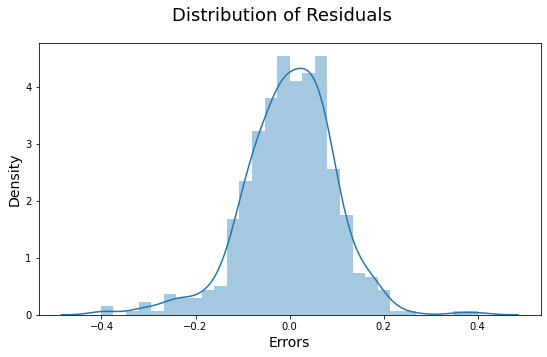

In [84]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=[9,5])
sns.distplot((y_train - y_train_pred), bins= 30)
fig.suptitle('Distribution of Residuals', fontsize= 18)
plt.xlabel('Errors', fontsize= 14)
plt.ylabel('Density', fontsize= 14)  

In [85]:
X_features= X_train_final.drop('const', axis= 1)

In [86]:
res= (y_train - y_train_pred)

In [87]:
#Creating function for residual vs features
def residual_plot(X_features, res, fig):
    fig.suptitle('Residual Plot', fontsize= 18)
    for i in range(X_features.shape[1]):
        plt.subplot(3,3,i+1)
        f= sns.scatterplot(y= res, x= X_features.iloc[:,i])
        f.axhline(0, color='r')
        plt.xlabel(X_features.iloc[:,i].name, fontsize= 12)
        plt.ylabel('Residuals', fontsize= 12)  
        fig.show()

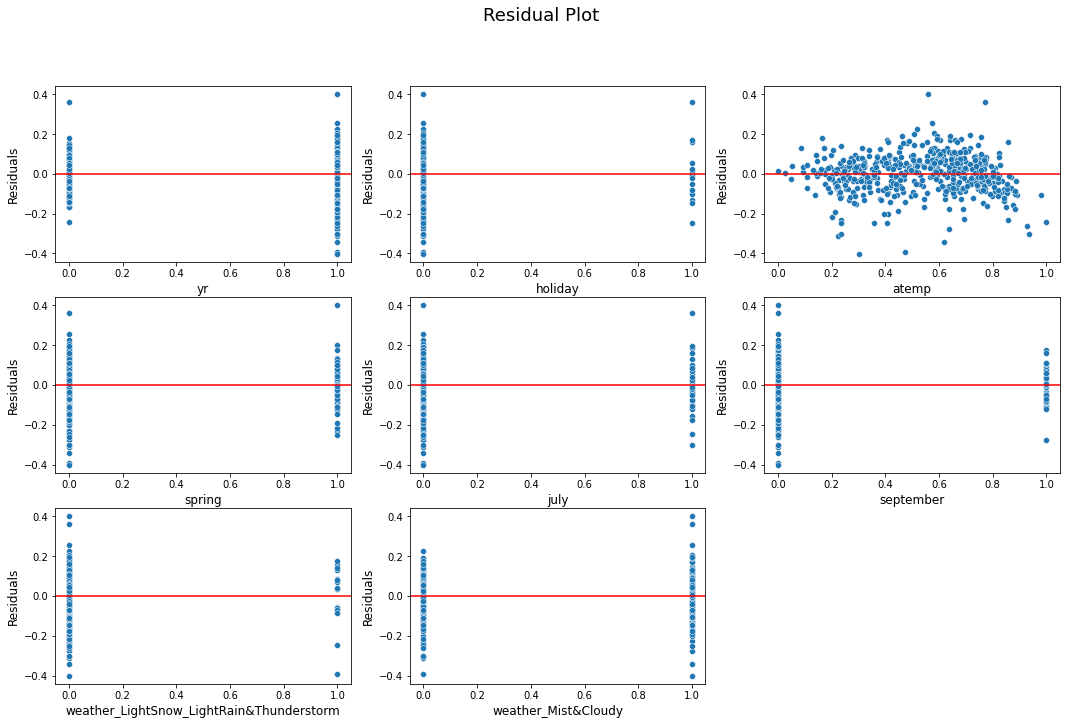

In [88]:
# Plotting scatterplot
fig= plt.figure(figsize=[18,11])

residual_plot(X_features, res, fig)

1. After performing Residual Analysis it can be seen that, Error Terms are near Normally distributed with mean at closer to 0.0.
2. Error Terms are independent of each other and there is no visible pattern. It can also be seen that for all predictor variables Error Terms are almost equally distributed around the red line (denoting mean= 0.0) with constant variance.

    So here, ϵ~ N(0,σ^2)
    
    All the assumptions of Linear Regression are met. So we can use our Linear Regression model for prediction.


## Making Predictions

In [89]:
# Checking Test dataset
bike_test.head(3)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,daydiff,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
120,0,0,1,22.41020,76.2083,7.125718,3351,4,0,1,...,0,0,0,0,0,0,1,0,0,1
447,1,0,0,24.33665,88.5417,12.916461,3372,447,0,1,...,0,0,0,0,1,0,0,0,0,1
449,1,0,1,21.93750,47.7917,25.917007,5558,449,0,1,...,0,0,0,0,0,0,1,0,0,0


In [90]:
# Performing MinMax Scaling on Test data
cols= ['atemp','hum','windspeed','daydiff','cnt']
bike_test[cols]= scaler.transform(bike_test[cols])
bike_test.head(3)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,daydiff,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
120,0,0,1,0.484539,0.785315,0.173093,0.382996,0.002751,0,1,...,0,0,0,0,0,0,1,0,0,1
447,1,0,0,0.535113,0.912409,0.351271,0.385412,0.612105,0,1,...,0,0,0,0,1,0,0,0,0,1
449,1,0,1,0.472129,0.492486,0.751290,0.636908,0.614856,0,1,...,0,0,0,0,0,0,1,0,0,0


In [91]:
# Selecting only required columns
features= X_features.columns.tolist()
features.append('cnt')
bike_test= bike_test[features]
bike_test.head(3)

,yr,holiday,atemp,spring,july,september,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy,cnt
120,0,0,0.484539,0,0,0,0,1,0.382996
447,1,0,0.535113,0,0,0,0,1,0.385412
449,1,0,0.472129,0,0,0,0,0,0.636908


In [92]:
# Getting Target for Test dataset
y_test= bike_test.pop('cnt')
y_test.head(3)

120    0.382996
447    0.385412
449    0.636908
Name: cnt, dtype: float64

In [93]:
# Getting Required features for Test data
X_test= bike_test[X_features.columns]
X_test.head(3)

,yr,holiday,atemp,spring,july,september,weather_LightSnow_LightRain&Thunderstorm,weather_Mist&Cloudy
120,0,0,0.484539,0,0,0,0,1
447,1,0,0.535113,0,0,0,0,1
449,1,0,0.472129,0,0,0,0,0


In [94]:
# Final Model Parameters
lr_model_10.params

const                                       0.239737
yr                                          0.233369
holiday                                    -0.111689
atemp                                       0.447841
spring                                     -0.142104
july                                       -0.056097
september                                   0.068470
weather_LightSnow_LightRain&Thunderstorm   -0.292620
weather_Mist&Cloudy                        -0.084082
dtype: float64

In [95]:
# Adding a constant variable 
X_test= sm.add_constant(X_test)

In [96]:
# Making predictions
y_test_pred= lr_model_10.predict(X_test)
y_test_pred.head(3)

120    0.372652
447    0.628670
449    0.684545
dtype: float64

## Model Evaluation

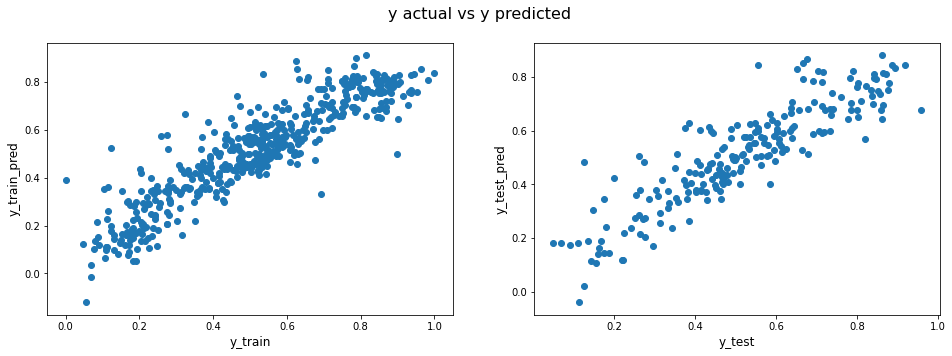

In [97]:
# Plotting y_test and y_test_pred to understand the spread
fig= plt.figure(figsize= [16,5])
fig.suptitle('y actual vs y predicted', fontsize= 16)
plt.subplot(1,2,1)
plt.scatter(y_train, y_train_pred)
plt.xlabel('y_train', fontsize= 12)
plt.ylabel('y_train_pred', fontsize= 12) 
plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test', fontsize= 12)
plt.ylabel('y_test_pred', fontsize= 12)
plt.show()

### Model Evolution metrics on train dataset

In [98]:
# Checking r-squared score on train dataset
r2_score(y_true= y_train, y_pred= y_train_pred)

0.8203593234604489

In [99]:
# Checking MSE score on train dataset
mean_squared_error(y_true= y_train, y_pred= y_train_pred)

0.009479291849580811

### Model Evolution metrics on test dataset

In [100]:
# Checking r-squared score on test dataset
r2_score(y_true= y_test, y_pred= y_test_pred)

0.7870927174605543

In [101]:
# Checking MSE score on test dataset
mean_squared_error(y_true= y_test, y_pred= y_test_pred)

0.008956186356482081

Overall we have a good model. We can see r-squared value is almost equal for Train and Test daatset. So, there is no overfitting. But previously we have seen 

We can see that the equation of our best fitted line is:

$ cnt= 0.233369  \times  yr - 0.111689  \times  holiday + 0.447841 \times atemp - 0.142104 \times spring - 0.056097 \times july + 0.068470 \times september - 0.292620 \times weather\_LightSnow\_LightRain\&Thunderstorm - 0.084082 \times weather\_Mist\&Cloudy + 0.239737 $
